In [1]:
import numpy as np

In [2]:
from rsnn.signals.utils import mod
from rsnn.signals.processing import global_correlation

In [3]:
rng = np.random.default_rng()

In [4]:
period = 10

In [5]:
ref1 = np.array([5.4])
ref2 = np.array([2.1, 7.3, 9.1])
ref3 = np.array([1.8, 2.9, 6.1])
refs = [ref1, ref2, ref3]

In [6]:
sim1 = ref1 + 1.1
sim2 = ref2 + 1.2
sim3 = ref3 + 0.9
sims = [sim1, sim2, sim3]

In [15]:
import matplotlib.pyplot as plt

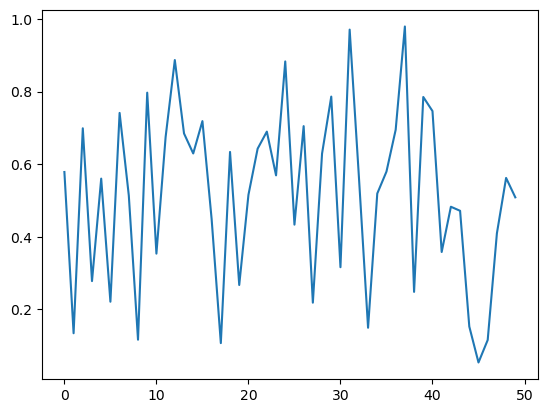

In [20]:
plt.plot(np.arange(50), rng.uniform(0,1,50))

In [7]:
def global_corr_v1(sims, refs, period):
    num_channels = len(sims)
    
    # compute all possible correlation maximizers
    lags = np.unique(np.concatenate([(sim[None,:] - ref[:,None]).flatten() for sim, ref in zip(sims, refs)]) % period)
    # TODO: rewrite global correlation function
    corr = np.zeros(1 + lags.size) # 1 for the case where t is empty
    for sim, ref in zip(sims, refs):
        if ((sim.shape[0] == 0) != (ref.shape[0] == 0)): # exactly one spike train is empty
            continue

        if (sim.shape[0] == 0) and (ref.shape[0] == 0): # both spike trains are empty
            corr[1:] += 1
            continue

        t = (sim[None,:] - ref[:,None]).flatten()
        corr[1:] += kernel(mod(lags[None,:] - t[:,None], period, -period/2)).sum(axis=0) / max(sim.shape[0], ref.shape[0])
    
    argmax = np.argmax(corr)
    if argmax == 0:
        return np.array(0.0), np.array(0.0)

    return corr[argmax] / num_channels, mod(lags[argmax-1], period, -period/2)

In [8]:
def global_corr_v2(sims, refs, period):
    Z = np.maximum([ref.size for ref in refs], [sim.size for sim in sims])
    Zmax = np.max(Z)
    
    refs_arr = np.stack([np.pad(ref, (0, Zmax - ref.size),  'constant', constant_values=np.nan) for ref in refs])
    sims_arr = np.stack([np.pad(sim, (0, Zmax - sim.size),  'constant', constant_values=np.nan) for sim in sims])
    
    lags = np.concatenate([(sim[None,:] - ref[:,None]).flatten() for ref, sim in zip(refs, sims)])
    corr = np.mean(np.nansum(kernel(mod(lags[:,None,None] - (sims_arr - refs_arr)[None,:,:], period, -period/2)), axis=-1) / Z, axis=-1)
    
    argmax = np.argmax(corr)
    return corr[argmax], mod(lags[argmax], period, -period/2)

In [9]:
global_corr_v1(sims, refs, period)

NameError: name 'kernel' is not defined

In [10]:
global_corr_v2(sims, refs, period)

NameError: name 'kernel' is not defined

In [14]:
global_correlation(refs, sims, period)

(0.9111111111111113, 1.0999999999999996)

In [14]:
sim = np.concatenate([sim1, sim2 + period])

In [15]:
ref = np.concatenate([ref1, ref2 + period])

In [71]:
Z = np.maximum([ref.size for ref in refs], [sim.size for sim in sims])


array([3, 3, 4])

In [18]:
eps = 1
kernel = lambda x_: (np.abs(x_) < eps) * (eps - np.abs(x_)) / eps


In [27]:
kernel((sim - ref)[:,None] - lags[None,:])

array([[-0. , -0. , -0. , -0. ,  0. , -0. , -0. , -0. ,  0. , -0. , -0. ,
        -0. ,  0.1],
       [ 0. , -0. , -0. , -0. , -0. , -0. , -0. ,  0.3, -0. , -0. , -0. ,
        -0. , -0. ],
       [ 0. , -0. , -0. , -0. , -0. , -0. , -0. ,  0.3, -0. , -0. , -0. ,
        -0. , -0. ],
       [-0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. , -0. ,  0.4, -0. ,
        -0. , -0. ],
       [ 0.1, -0. , -0. , -0. , -0. , -0. , -0. ,  0.4, -0. , -0. , -0. ,
        -0. , -0. ]])